In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

In [3]:
datapath = os.path.join ("datasets", "telecom", "")

In [4]:
test_churn = pd.read_csv(datapath + "churn-bigml-20.csv")
test_churn.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
train_churn = pd.read_csv(datapath + "churn-bigml-80.csv")
train_churn.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
test_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [7]:
train_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
train_churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
test_churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [10]:
train_churn["Churn"].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [11]:
test_churn["Churn"].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [12]:
# The percentage of the customers churning from the company 
percentage_churn = (train_churn["Churn"].sum()) * 100 / train_churn.shape[0]
percentage_churn

14.553638409602401

In [13]:
train_churn["State"].value_counts()

WV    88
MN    70
NY    68
VA    67
AL    66
WY    66
OH    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
NC    56
ID    56
TX    55
IN    54
FL    54
MT    53
MA    52
KS    52
OK    52
MO    51
DE    51
NJ    50
SC    49
SD    49
GA    49
ME    49
RI    48
WA    48
MS    48
AR    47
AZ    45
DC    45
NE    45
IL    45
HI    44
NM    44
ND    44
NH    43
KY    43
AK    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64

In [14]:
train_churn["State"].nunique()

51

In [15]:
train_churn["International plan"].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

In [16]:
train_churn["Voice mail plan"].value_counts()

No     1933
Yes     733
Name: Voice mail plan, dtype: int64

In [17]:
train_churn["Churn"].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [18]:
train_churn["Churn"] = train_churn["Churn"].map({False : 'No', True : 'Yes'})
train_churn.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,No
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,No
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,No
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,No
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,No


In [19]:
test_churn["Churn"] = test_churn["Churn"].map({False : 'No', True : 'Yes'})
test_churn.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,No
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,Yes
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,Yes
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,No
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,No


In [20]:
train_cat = train_churn.select_dtypes(exclude=["number", "float", "bool"])
train_cat.head(5)

,State,International plan,Voice mail plan,Churn
0,KS,No,Yes,No
1,OH,No,Yes,No
2,NJ,No,No,No
3,OH,Yes,No,No
4,OK,Yes,No,No


In [21]:
test_cat = test_churn.select_dtypes(exclude=["number", "float", "bool"])
test_cat.head(5)

,State,International plan,Voice mail plan,Churn
0,LA,No,No,No
1,IN,No,No,Yes
2,NY,No,No,Yes
3,SC,No,No,No
4,HI,No,No,No


In [22]:
train_num = train_churn.select_dtypes(exclude=["bool", "object"])
train_num.head(5)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [23]:
test_num = test_churn.select_dtypes(exclude=["bool", "object"])
test_num.head(5)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [24]:
# Converting the categorical data to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_churn['International plan'] = label_encoder.fit_transform(train_churn['International plan'])
train_churn['Voice mail plan'] = label_encoder.fit_transform(train_churn['Voice mail plan'])
test_churn['International plan'] = label_encoder.fit_transform(test_churn['International plan'])
test_churn['Voice mail plan'] = label_encoder.fit_transform(test_churn['Voice mail plan'])
# train_churn['Churn'] = label_encoder.fit_transform(train_churn['Churn'])

In [25]:
corr_matrix = train_churn.corr()

<AxesSubplot:>

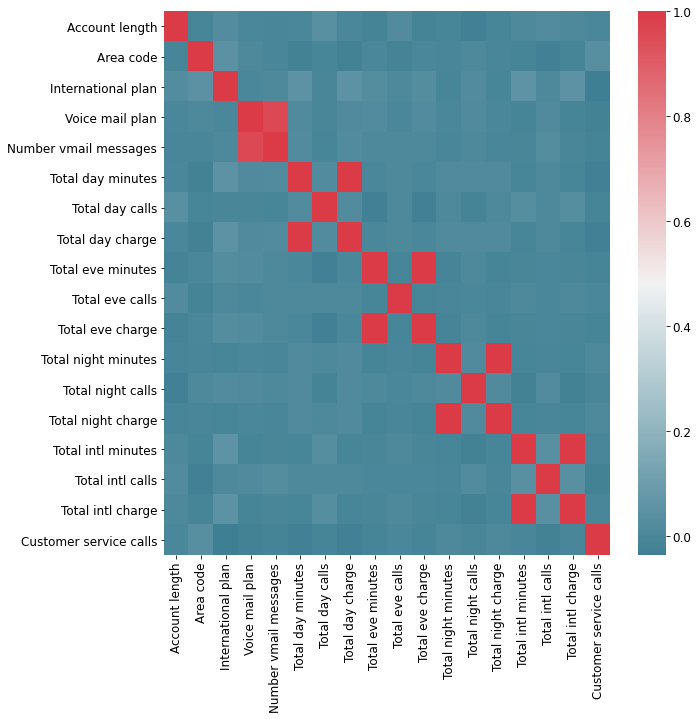

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, cmap=cmap , ax=ax)

In [27]:
corr_matrix["Total day minutes"].sort_values(ascending=False)

Total day minutes         1.000000
Total day charge          1.000000
International plan        0.049550
Number vmail messages     0.019027
Total day calls           0.016780
Total night calls         0.015054
Total night minutes       0.013491
Total night charge        0.013464
Voice mail plan           0.013438
Total eve calls           0.009059
Total intl calls          0.005687
Total eve minutes         0.003999
Total eve charge          0.003992
Account length            0.002847
Total intl charge        -0.010934
Total intl minutes       -0.011042
Area code                -0.023134
Customer service calls   -0.024543
Name: Total day minutes, dtype: float64

In [28]:
train2 = train_churn.copy()
test2 = test_churn.copy()
train2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,No
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,No
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,No
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,No
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,No
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,No
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,No
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,No


In [29]:
train_churn.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes', 'State','Voice mail plan' ], axis=1, inplace=True)

In [30]:
test_churn.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes', 'State', 'Voice mail plan'], axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'Account length'}>,
        <AxesSubplot:title={'center':'Area code'}>,
        <AxesSubplot:title={'center':'International plan'}>,
        <AxesSubplot:title={'center':'Number vmail messages'}>],
       [<AxesSubplot:title={'center':'Total day calls'}>,
        <AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>,
        <AxesSubplot:title={'center':'Total eve charge'}>],
       [<AxesSubplot:title={'center':'Total night calls'}>,
        <AxesSubplot:title={'center':'Total night charge'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>,
        <AxesSubplot:title={'center':'Total intl charge'}>],
       [<AxesSubplot:title={'center':'Customer service calls'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

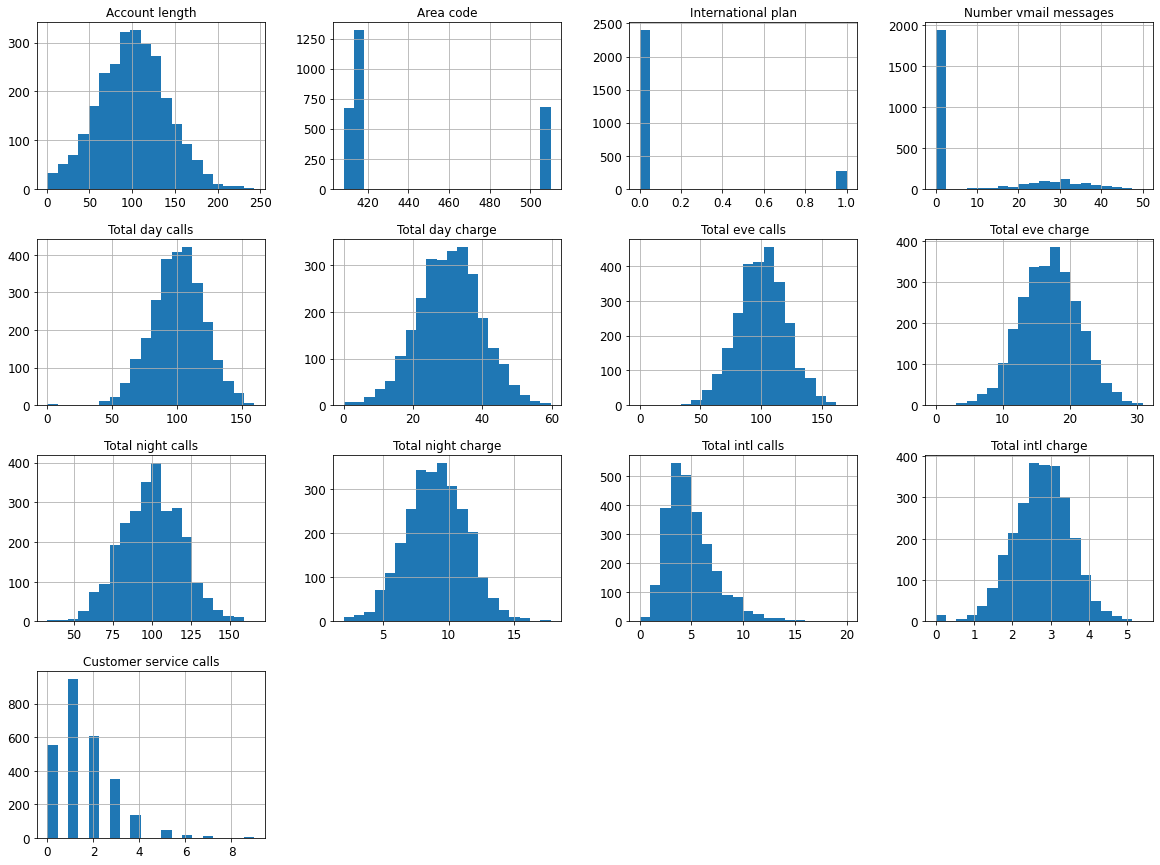

In [31]:
train_churn.hist(bins=20, figsize=(20,15))

In [32]:
# Separating the output varibale churn
y = train_churn['Churn']
y.size 

2666

In [33]:
train_churn.head(5)

,Account length,Area code,International plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,No
1,107,415,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,No
2,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,No
3,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,No
4,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,No


In [34]:
y_test = test_churn['Churn']
y_test.size 

667

In [35]:
y = y.replace({'No':0, 'Yes':1})

In [36]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64

In [37]:
y_test = y_test.replace({'No':0, 'Yes':1})

In [38]:
y_test

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

In [39]:
X = train_churn.loc[:, train_churn.columns!='Churn']

In [40]:
X

,Account length,Area code,International plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,415,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,415,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,408,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,415,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,98,22.90,68,16.12,128,9.96,5,3.19,2
2662,192,415,0,36,77,26.55,126,18.32,83,12.56,6,2.67,2
2663,68,415,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3
2664,28,510,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2


In [41]:
X_test = test_churn.loc[:, train_churn.columns!='Churn']

In [42]:
X_test

,Account length,Area code,International plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1
1,65,415,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4
2,161,415,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4
3,111,415,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2
4,49,510,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,0,26,88,23.31,125,13.23,94,11.14,7,3.11,2
663,106,408,0,29,131,14.21,131,17.33,73,10.33,3,2.19,1
664,60,415,0,0,118,32.96,110,7.23,134,9.45,8,3.56,3
665,159,415,0,0,114,28.87,105,16.80,82,8.72,4,3.13,1


In [43]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [45]:
X

array([[ 0.69216332, -0.52781119, -0.33569005, ..., -0.59752673,
        -0.08568137, -0.42917241],
       [ 0.16127783, -0.52781119, -0.33569005, ..., -0.59752673,
         1.24292063, -0.42917241],
       [ 0.91968567, -0.52781119, -0.33569005, ...,  0.21689365,
         0.69819381, -1.19195484],
       ...,
       [-0.82465237, -0.52781119, -0.33569005, ..., -0.19031654,
        -0.23182759,  1.09639245],
       [-1.83586283,  1.70679716, -0.33569005, ...,  0.62410384,
         1.38906685,  0.33361002],
       [-0.6729708 , -0.52781119, -0.33569005, ..., -0.19031654,
         1.24292063, -1.19195484]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=1, max_iter=10000)
LR_model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=10000)

In [48]:
y_pred = LR_model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[440,  15],
       [ 61,  18]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8576779026217228

In [51]:
from sklearn.svm import SVC
svclassification = SVC(kernel = 'linear', random_state = 1)
svclassification.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [52]:
y_pred = svclassification.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[455,   0],
       [ 79,   0]], dtype=int64)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8520599250936329

In [55]:
svclassification = SVC(kernel="rbf", gamma=5, C=0.001)
svclassification.fit(X_train, y_train)

SVC(C=0.001, gamma=5)

In [56]:
y_pred = svclassification.predict(X_test)

In [57]:

confusion_matrix(y_test, y_pred)

array([[455,   0],
       [ 79,   0]], dtype=int64)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8520599250936329

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel':['linear']},
              {'C': [1, 10, 100], 'kernel':['rbf'], 'gamma': [0.001, 0.025, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5]}]
grid_search = GridSearchCV(estimator = svclassification,
                           param_grid = parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [60]:
accuracy = grid_search.best_score_

In [61]:
accuracy

0.9155697424421921

In [62]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [63]:
classifier = SVC(kernel = 'rbf', gamma=0.025, C=100)
classifier.fit(X_train, y_train)

SVC(C=100, gamma=0.025)

In [64]:
y_pred = classifier.predict(X_test)

In [65]:
confusion_matrix(y_test, y_pred)

array([[442,  13],
       [ 31,  48]], dtype=int64)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9176029962546817

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtreeclassifier = DecisionTreeClassifier(max_depth=3)
dtreeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [68]:
y_pred = dtreeclassifier.predict(X_test)

[Text(167.4, 190.26, 'X[5] <= 1.567\ngini = 0.248\nsamples = 2132\nvalue = [1823, 309]'),
 Text(83.7, 135.9, 'X[12] <= 1.478\ngini = 0.204\nsamples = 2000\nvalue = [1769, 231]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 1.322\ngini = 0.155\nsamples = 1846\nvalue = [1690, 156]'),
 Text(20.925, 27.180000000000007, 'gini = 0.093\nsamples = 1664\nvalue = [1583, 81]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.485\nsamples = 182\nvalue = [107, 75]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= -0.361\ngini = 0.5\nsamples = 154\nvalue = [79, 75]'),
 Text(104.625, 27.180000000000007, 'gini = 0.252\nsamples = 61\nvalue = [9, 52]'),
 Text(146.475, 27.180000000000007, 'gini = 0.372\nsamples = 93\nvalue = [70, 23]'),
 Text(251.10000000000002, 135.9, 'X[3] <= -0.112\ngini = 0.483\nsamples = 132\nvalue = [54, 78]'),
 Text(209.25, 81.53999999999999, 'X[7] <= -0.65\ngini = 0.398\nsamples = 102\nvalue = [28, 74]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.417\nsa

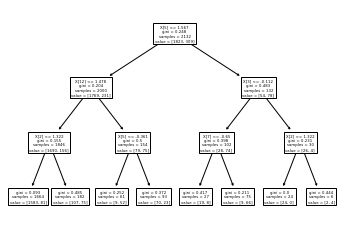

In [69]:
from sklearn.tree import plot_tree
plot_tree(dtreeclassifier)

In [70]:
accuracy_score(y_test, y_pred)

0.9063670411985019

In [71]:
from sklearn.ensemble import VotingClassifier
logistic = LogisticRegression(random_state=42)
decisiontree = DecisionTreeClassifier(max_depth=3)
svm = SVC(kernel="rbf", gamma=5, C=0.001)
voting_clf = VotingClassifier(estimators = [('lr', logistic), ('dt', decisiontree), ('svm', svm)],
                             voting='hard')

In [72]:
for clf in (logistic, decisiontree, svm, voting_clf):
    clf.fit(X_train, y_train);
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8576779026217228
DecisionTreeClassifier 0.9063670411985019
SVC 0.8520599250936329
VotingClassifier 0.8632958801498127


In [75]:
logistic = LogisticRegression(random_state=42)
decisiontree = DecisionTreeClassifier(max_depth=3)
svm = SVC(kernel="rbf", gamma=5, C=0.001, probability=True)
voting_clf = VotingClassifier(estimators = [('lr', logistic), ('dt', decisiontree), ('svm', svm)],
                             voting='soft')

In [76]:
for clf in (logistic, decisiontree, svm, voting_clf):
    clf.fit(X_train, y_train);
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8576779026217228
DecisionTreeClassifier 0.9063670411985019
SVC 0.8520599250936329
VotingClassifier 0.8614232209737828


In [78]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.3)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.3, n_estimators=100)

In [79]:
y_pred = ada_clf.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred)

0.8745318352059925

In [94]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=3)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
y2 = y_train - tree1.predict(X_train)
tree2 = DecisionTreeRegressor(max_depth=3, random_state=10)
tree2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [96]:
y3 = y2 - tree2.predict(X_train)
tree3 = DecisionTreeRegressor(max_depth=3, random_state=10)
tree3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [97]:
y_pred = sum(tree.predict(X_test) for tree in (tree1, tree2, tree3))

In [98]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, n_estimators=3)

In [99]:
y_pred = gbrt.predict(X_test)

In [103]:
from sklearn.ensemble import StackingClassifier
base_learners = [
                 ('dtc_1', DecisionTreeClassifier(max_depth=3, random_state=10)),
                 ('svm', SVC(kernel = 'linear', random_state = 1))  ] 
    
clf = StackingClassifier(estimators=base_learners, 
                         final_estimator=LogisticRegression(),
                         cv=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8905547226386806

In [105]:
from sklearn.ensemble import RandomForestClassifier
layer_one_estimators = [
                         ('dtc_1', DecisionTreeClassifier(max_depth=3, random_state=10)),
                 ('svm', SVC(kernel = 'linear', random_state = 1)) ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8665667166416792